In [73]:
#system stuff
import os
import sys
sys.path.append(os.path.join(".."))
from pathlib import Path
import pandas as pd
import csv
import glob

#image processing
import cv2
import numpy as np

#display utils
from utils_ross.imutils import jimshow
import matplotlib.pyplot as plt

In [74]:
os.getcwd()

'/home/cds-au579253/cds-visual/Homework/Assignment2/src'

In [75]:
#defining data path
data_path = os.path.join("..", "Data", "jpg")

In [76]:
#defining image I want to work with
main_image = cv2.imread(os.path.join("..", "Data", "jpg", "image_0001.jpg"))

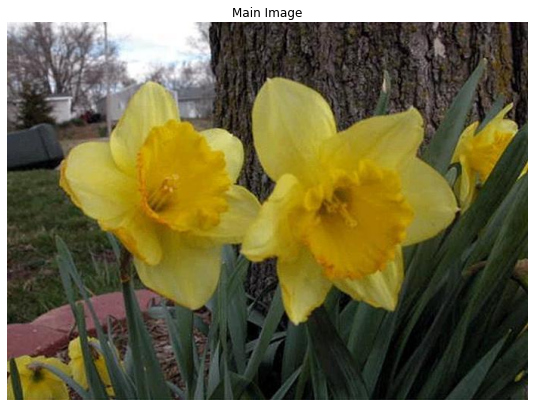

In [77]:
#showing image
jimshow(main_image, "Main Image")

In [78]:
#defining the path for the other images
image_dir = os.path.join("..", "Data", "jpg")

In [79]:
#creating empty list for distance
distance= []

In [80]:
#creating a for loop for comparing each image in the list to the main image
for image in Path(image_dir).glob("*.jpg"):
    #cv2 and pathlib don't play nicely together so
    image_path = str(image)
    #read image 
    image = cv2.imread(image_path)
    #get image_name from image_path
    filename = _, image_name = os.path.split(image_path) #_ is a dummy variable
    #split channels
    channels = cv2.split(image)
    #create histogram
    hist= cv2.calcHist([image], [0,1,2], None, [8,8,8], [0, 256, 0, 256, 0, 256])
    #defining main image histogram
    hist1 = cv2.calcHist([main_image], [0,1,2], None, [8,8,8], [0, 256, 0, 256, 0, 256])
    #then compare them one by one using chi-square distance method, rounding to 2 decimal places
    chi_sq = round(cv2.compareHist(hist, hist1, cv2.HISTCMP_CHISQR), 2)
    
    #appending the empty distance list with the chi-square values
    distance.append(chi_sq)

In [81]:
#making a list of filenames
filenames = [os.path.basename(image_name) for image_name in Path(image_dir).glob("*.jpg")]

In [82]:
#creating csv file with filenames and distance
df = pd.DataFrame(data={"filename": filenames, "distance": distance})

In [91]:
#creating new df without main image and its distance value, because we don't want to compare it to itself
df = df[df.filename != 'image_0001.jpg']
#saving df as .csv file
outpath = os.path.join("..", "Output", "image_distance.csv")
df.to_csv(outpath, sep=',', index= False)

In [92]:
#looking for lowest distance (most similar image)
df.min()["distance"]

347200.09

In [93]:
#finding the image name
print (df.loc[df["distance"] == 347200.09])

           filename   distance
214  image_0090.jpg  347200.09


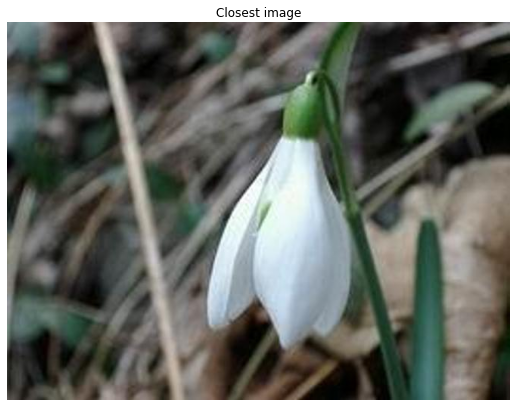

In [94]:
#showing the closest image
closest_image = cv2.imread(os.path.join("..", "Data", "jpg", "image_0090.jpg"))
jimshow(closest_image, "Closest image")